In [142]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from scipy import stats


In [143]:
data=pd.read_csv('avocado.csv')

In [144]:
df=pd.DataFrame(data)

In [145]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [146]:
df.shape

(18249, 14)

The dataset has 18249 rows and 14 columns

In [147]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

We can see the column names .AveragePrice is the target variable and is continuous in nature

In [148]:
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

We can see the datatype of each column.Most of the columns are float in nature.

In [149]:
df=df.drop(['Unnamed: 0'],axis=1)


The unnames column was dropped since it does not play any role in predicting the price of Avacado.

In [150]:
df.shape

(18249, 13)

The dataset has 13 columns after dropping the unnamed column

# Checking Null values

In [151]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

<AxesSubplot:>

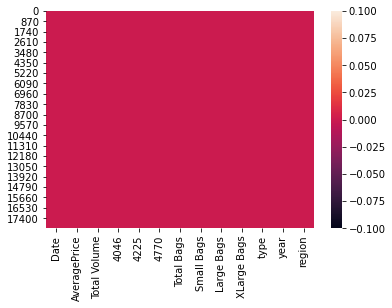

In [152]:
sns.heatmap(df.isnull())

There are no null values in the dataset

# Lets do some feature engineering on the date feature so we can use the day and the month columns in building our model.

In [153]:
df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)

In [154]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


# Plotting the Avocado's Average price through the date column

Text(0.5, 1.0, 'Average Price')

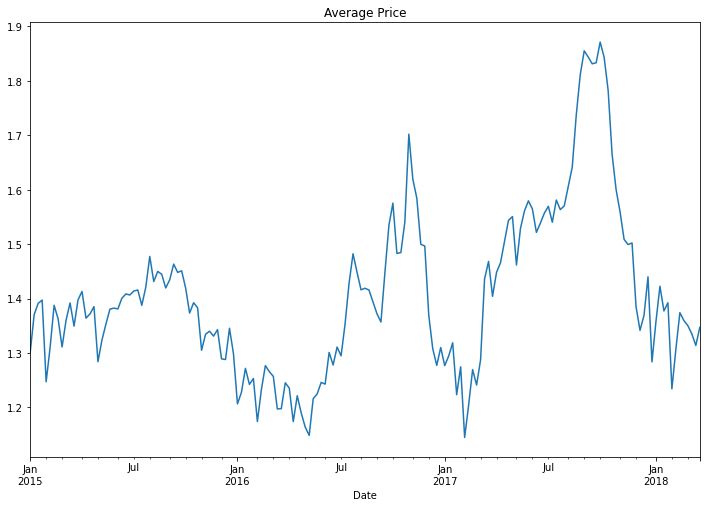

In [155]:
byDate=df.groupby('Date').mean()
plt.figure(figsize=(12,8))
byDate['AveragePrice'].plot()
plt.title('Average Price')

# Checking the ratio of year and price that which year had the max average price

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

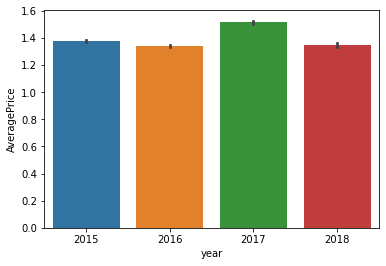

In [156]:
sns.barplot(x='year',y='AveragePrice',data=df)

The above graph shows that 2017 is the year where the price is max

# Checking collinearity

<AxesSubplot:>

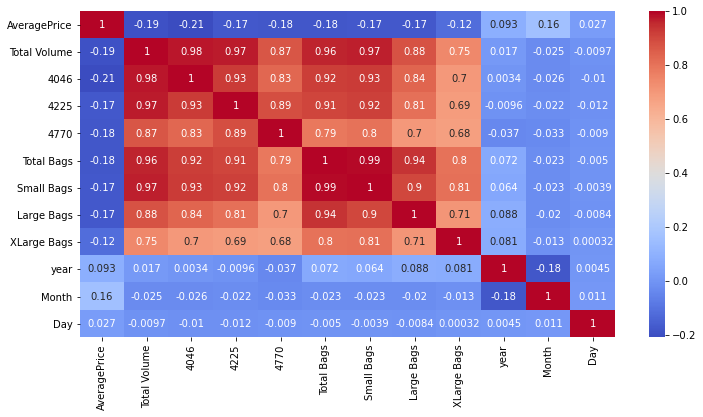

In [157]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

From the heatmap we can see that all the Feature columns are not correlated with the Average Price column but the Feature columns are correlated to each other

# Lets do some feature engineering on the categorical features region and type

In [158]:
df['region'].nunique()

54

In [159]:
df['type'].nunique()

2

We can see that we have 54 regions and 2 unique types,so its going to be easy to transform the type feature to dummies,but for the region its going to be a bit comples so dropping the entire column.I will drop the date feature as well because i already have 3 other columns for the year,month and day.

In [160]:
df_final=pd.get_dummies(df.drop(['region','Date'],axis=1),drop_first=True)

In [161]:
df_final.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day,type_organic
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,12,27,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,12,20,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,12,13,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,12,6,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,11,29,0


In [162]:


df_final.tail()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day,type_organic
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018,2,4,1
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018,1,28,1
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018,1,21,1
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018,1,14,1
18248,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,2018,1,7,1


# Now our data are ready! lets apply our model which is going to be the Linear Regression because our Target variable 'AveragePrice'is continuous. Let's now begin to train out regression model! We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable

In [163]:
X=df_final.iloc[:,1:14]
y=df_final['AveragePrice']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)



# Creating and training the Model

In [164]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)

In [165]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.2329713329170077
MSE: 0.0910880280536491
RMSE: 0.3018079323902026


The RMSE is low so we can say that we do have a good model, but lets check to be more sure. Lets plot the y_test vs the predictions

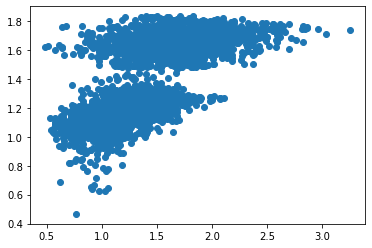

In [166]:
plt.scatter(x=y_test,y=pred)


We can see that we dont have a straight line so this cannot be the best model

# Lets try with the DecisionTree Regressor model

In [167]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)
pred=dtr.predict(X_test)

Text(0, 0.5, 'Predicted Y')

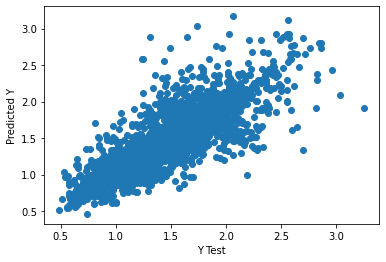

In [168]:
plt.scatter(x=y_test,y=pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')




We can see that we almost have a straight line better than Linear regressor model

In [169]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.13623013698630135
MSE: 0.045653698630136984
RMSE: 0.213667261484152


RMSE is lower than the one we got with Linear model.

# RandomForestRegressor

In [170]:
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor()
rdr.fit(X_train,y_train)
pred=rdr.predict(X_test)

In [173]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.10085824657534247
MSE: 0.021519646197260264
RMSE: 0.14669576066560433


RMSE is lower than the previous two models

<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

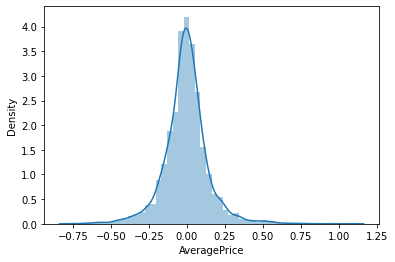

In [175]:
sns.distplot((y_test-pred),bins=50)

In [ ]:
The AveragePrice is normally distributed and it is the best model.

In [176]:
from sklearn.linear_model import Ridge

rd = Ridge()
rd.fit(X_train,y_train)
pred = rd.predict(X_test)

In [177]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.2329704787890794
MSE: 0.09108751502080069
RMSE: 0.30180708245632787


RMSE is the same as that of Linear regression.

Text(0, 0.5, 'Predicted Y')

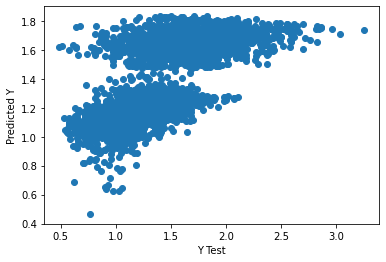

In [178]:
plt.scatter(x=y_test,y=pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

The data is not in the straight line hence it is not the best model

# Conclusion :RandomForestRegressor is the best model